<a href="https://colab.research.google.com/github/cleogrs/analytics/blob/main/Correlacao_e_Regressao_Cleo_Gomes_da_Rocha_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregar Dataframe kc_house_data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

#importando csv
hd = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')

#cabeçalho
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

# Atividade 1

Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

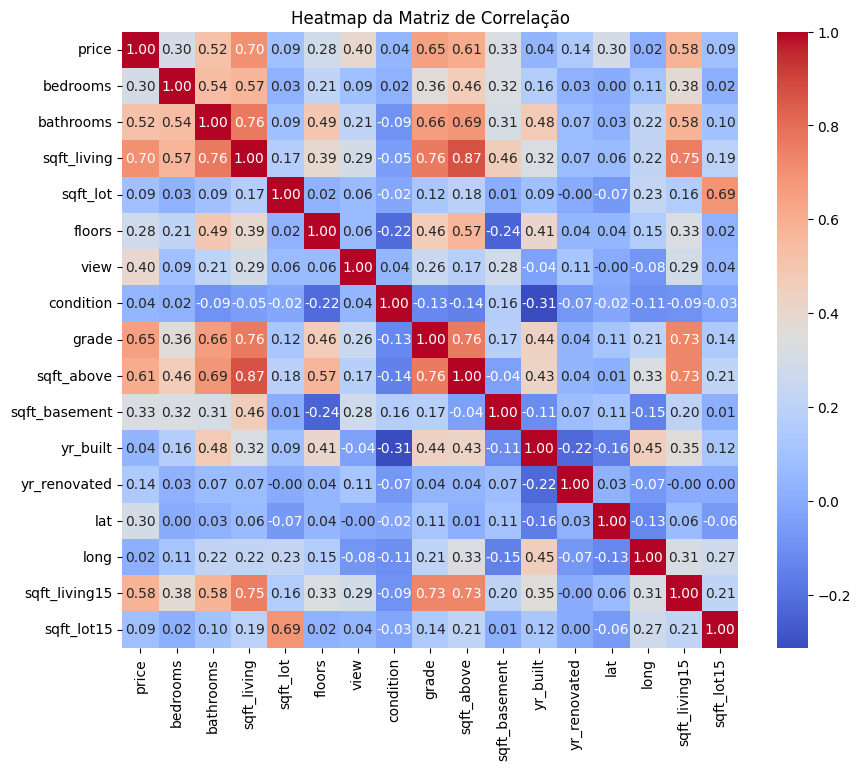

In [ ]:
# Exibir a matriz de correlação entre as variáveis numéricas
hd_num = hd[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
correlacao = hd_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap da Matriz de Correlação")
plt.show()

In [ ]:
# Calcular a correlação entre o preço (price) e o número de quartos (bedrooms)
correlacao_price_bedrooms = hd_num['price'].corr(hd_num['bedrooms'])
print("\nCorrelação entre o preço (price) e o número de quartos (bedrooms):", correlacao_price_bedrooms)

# Considerar apenas casas com área total sqft_living superior a 2000 pés quadrados
hd_maior_2000_sqft = hd_num[hd_num['sqft_living'] > 2000]

# Calcular a correlação entre o preço (price) e o número de quartos (bedrooms) para casas com área total sqft_living superior a 2000 pés quadrados
correlacao_price_bedrooms_maior_2000_sqft = hd_maior_2000_sqft['price'].corr(hd_maior_2000_sqft['bedrooms'])
print("\nCorrelação entre o preço (price) e o número de quartos (bedrooms) para casas com área total sqft_living superior a 2000 pés quadrados:", correlacao_price_bedrooms_maior_2000_sqft)


Correlação entre o preço (price) e o número de quartos (bedrooms): 0.29920721616918206

Correlação entre o preço (price) e o número de quartos (bedrooms) para casas com área total sqft_living superior a 2000 pés quadrados: 0.11912115548964147


# Atividade 2

Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?


In [ ]:
# Considerar apenas casas com pelo menos 2 banheiros
hd_2_bathrooms = hd_num[hd_num['bathrooms'] >= 2]

# Calcular a correlação entre o preço (price) e a área total (sqft_living)
correlacao_price_2btahs_sqft_living = hd_2_bathrooms['price'].corr(hd_2_bathrooms['sqft_living'])
print("\nCorrelação entre o preço (price) e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros(bathrooms):", correlacao_price_2btahs_sqft_living)


Correlação entre o preço (price) e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros(bathrooms): 0.7067107107996193


# Atividade 3

Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?


In [ ]:
# Correlação entre sqft_living e price para diferentes quantidades de banheiros
correlacao_sqft_living_price_bathrooms = hd.groupby('bathrooms')[['sqft_living', 'price']].corr().loc[(slice(None), 'sqft_living'), 'price']
print("Correlação entre sqft_living e price para diferentes quantidades de banheiros:")
print(correlacao_sqft_living_price_bathrooms)

Correlação entre sqft_living e price para diferentes quantidades de banheiros:
bathrooms             
0.00       sqft_living    0.916837
0.50       sqft_living         NaN
0.75       sqft_living    0.357178
1.00       sqft_living    0.359529
1.25       sqft_living    0.167331
1.50       sqft_living    0.423405
1.75       sqft_living    0.449225
2.00       sqft_living    0.446945
2.25       sqft_living    0.598274
2.50       sqft_living    0.559945
2.75       sqft_living    0.522397
3.00       sqft_living    0.569033
3.25       sqft_living    0.544659
3.50       sqft_living    0.566392
3.75       sqft_living    0.465538
4.00       sqft_living    0.584480
4.25       sqft_living    0.444766
4.50       sqft_living    0.796040
4.75       sqft_living    0.649359
5.00       sqft_living    0.747219
5.25       sqft_living    0.901217
5.50       sqft_living    0.411625
5.75       sqft_living    1.000000
6.00       sqft_living    1.000000
6.75       sqft_living    1.000000
7.50       sqft_living 

# Atividade 4
Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?

In [ ]:
# Converter coluna 'date' para datetime
hd['date'] = pd.to_datetime(hd['date'])

# Calcular a correlação entre 'condition' e 'price' para casas com 'sqft_living' > 3000
correlacao_price_sqft_maior_3000 = hd[hd['sqft_living'] > 3000].corr().loc['price', 'condition']
print("Correlação entre condition e price para casas com sqft_living > 3000:", correlacao_price_sqft_maior_3000)

Correlação entre condition e price para casas com sqft_living > 3000: 0.10527844723732628


# Atividade 5

Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
# correlação entre 'lat/long' e 'price' para casas com pelo menos três quartos
correlation_lat_long_price_bedrooms_3 = hd[hd['bedrooms'] >= 3].corr().loc[['lat', 'long'], 'price']
print("Correlação entre lat/long e price para casas com pelo menos três quartos:")
print(correlation_lat_long_price_bedrooms_3)

Correlação entre lat/long e price para casas com pelo menos três quartos:
lat     0.312555
long   -0.007275
Name: price, dtype: float64


# Atividade 6
Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.



In [ ]:
# Filtrar os dados para considerar apenas as casas com e sem vista para o mar
waterfront_yes = hd[hd['waterfront'] == 'y']['price']
waterfront_no = hd[hd['waterfront'] == 'n']['price']

# Executar o teste ANOVA
anova_result = stats.f_oneway(waterfront_yes, waterfront_no)

# Exibir o resultado
print("Resultado do teste ANOVA:")
print(anova_result)

Resultado do teste ANOVA:
F_onewayResult(statistic=964.5733248785584, pvalue=2.97380815121432e-202)


# Carregar Dataframe CAR PRICE

In [ ]:
# Carregar o conjunto de dados
cd = pd.read_csv('/content/drive/MyDrive/car_price.csv')

cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

# Atividade 7
Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.

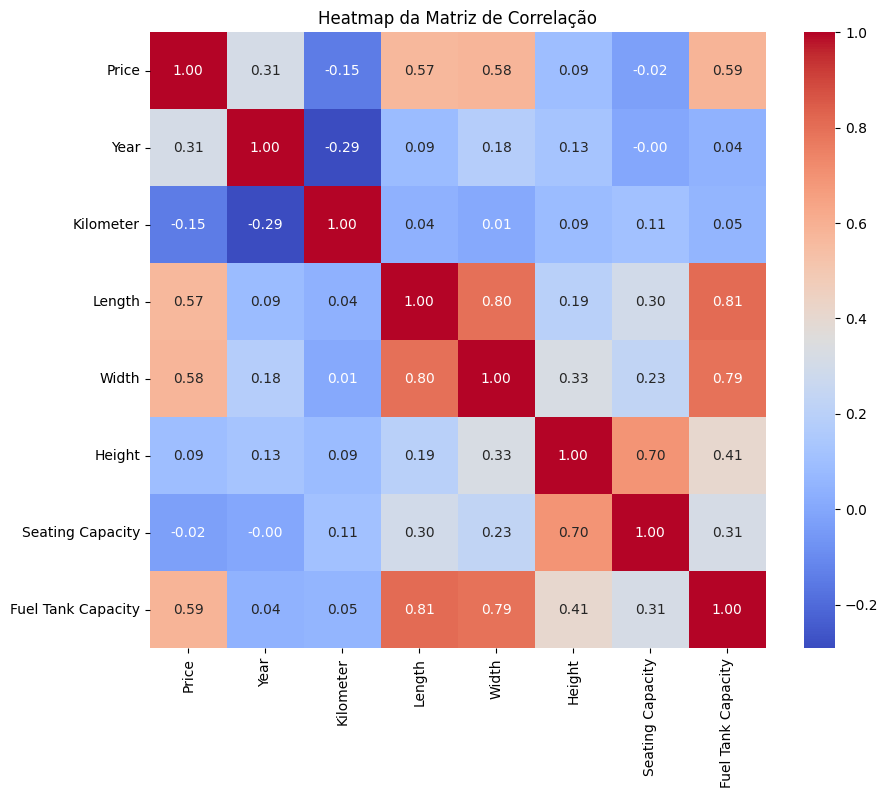

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = cd.select_dtypes(include=['int64', 'float64']).corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap da Matriz de Correlação")
plt.show()

# Atividade 8
Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.

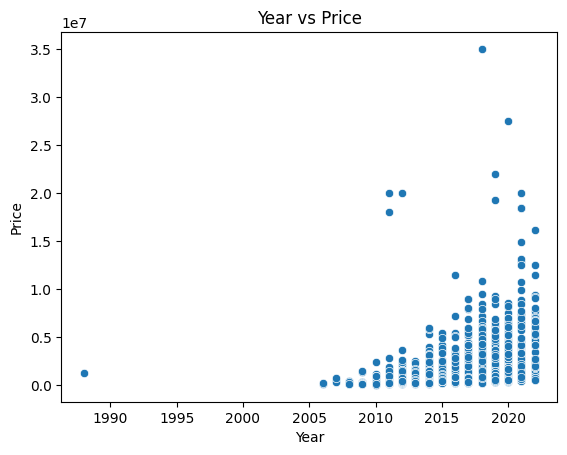

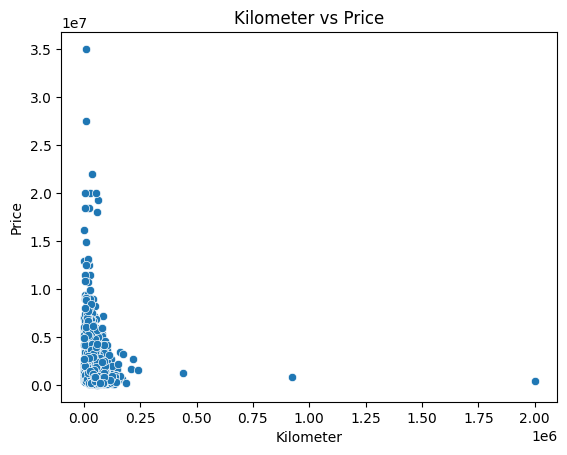

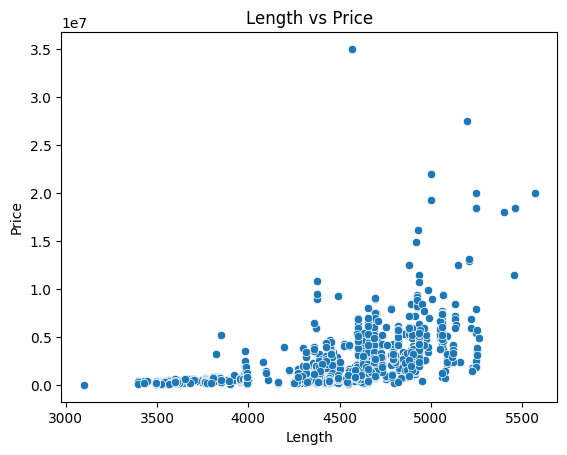

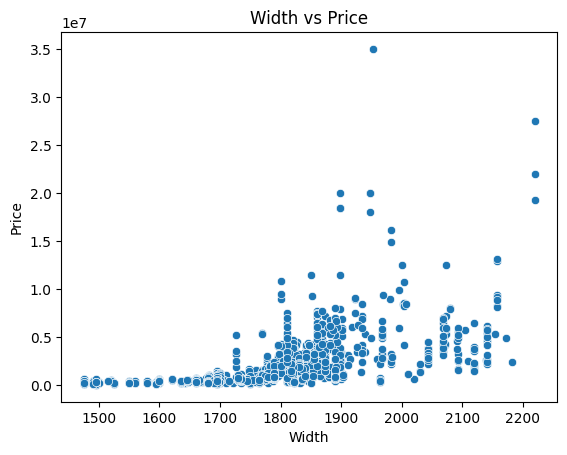

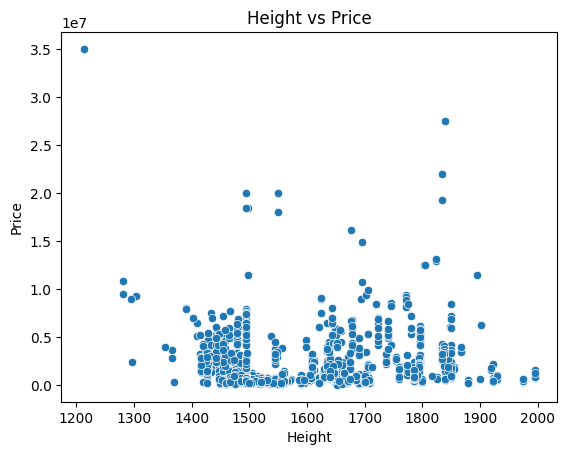

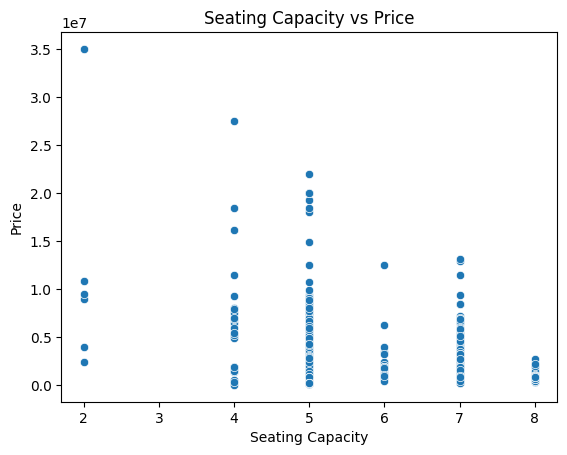

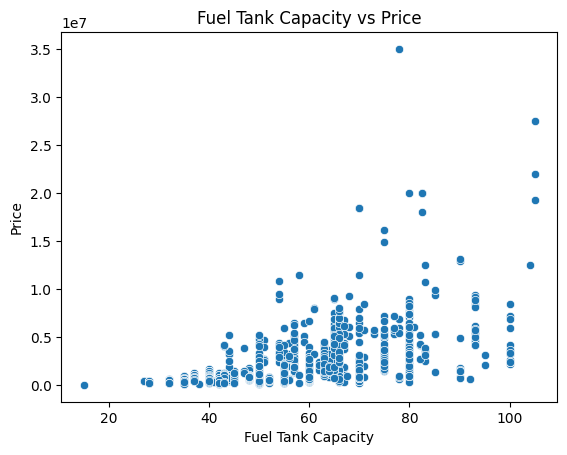

In [ ]:

# Gráficos de dispersão para cada variável numérica em relação a 'price'
for column in cd.columns:
    if cd[column].dtype != 'object' and column != 'Price':
        sns.scatterplot(x=column, y='Price', data=cd)
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.title(f'{column} vs Price')
        plt.show()

# Atividade 9

Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     198.1
Date:                Mon, 27 May 2024   Prob (F-statistic):           7.48e-43
Time:                        16:25:47   Log-Likelihood:                -30115.
No. Observations:                1874   AIC:                         6.023e+04
Df Residuals:                    1872   BIC:                         6.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.806e+08   3.43e+07    -14.026      0.0

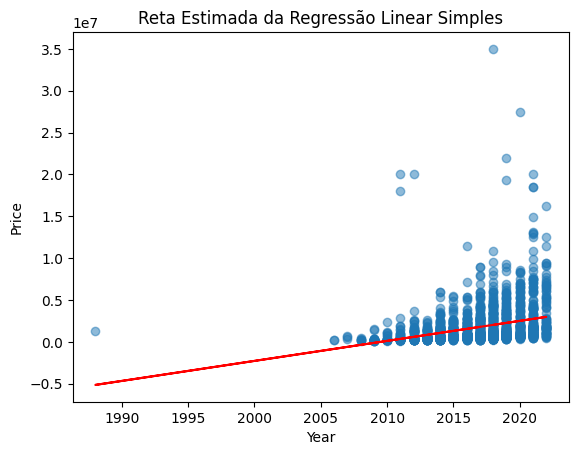

In [ ]:

# Definir a variável independente (X) e a variável dependente (y)
X = cd['Year']
y = cd['Price']

# Adicionar uma constante ao X para o termo de interceptação
X = sm.add_constant(X)

# Criar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir a tabela de regressão
print(model.summary())

# Plotar a reta estimada
plt.scatter(X.iloc[:, 1], y, alpha=0.5)  # Scatter plot dos dados
plt.plot(X.iloc[:, 1], model.predict(X), color='red')  # Reta estimada
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Reta Estimada da Regressão Linear Simples')
plt.show()

# Atividade 10
Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.

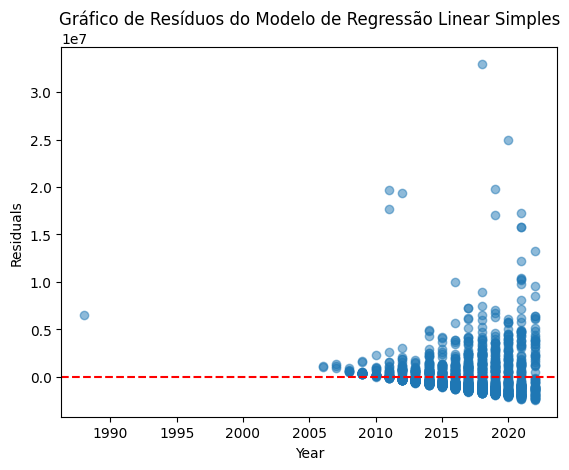

In [ ]:
# Calcular os resíduos do modelo de Regressão Linear Simples
residuals = y - model.predict(X)

# Plotar o gráfico dos resíduos
plt.scatter(X.iloc[:, 1], residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal em y=0 para referência
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Gráfico de Resíduos do Modelo de Regressão Linear Simples')
plt.show()

# Atividade 11

Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Mon, 27 May 2024   Prob (F-statistic):          1.49e-278
Time:                        16:27:11   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

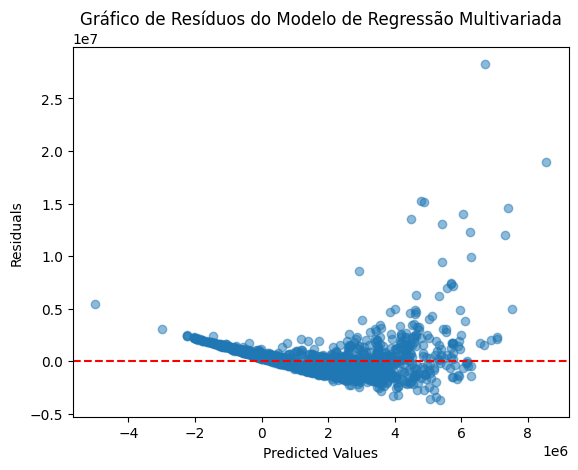

In [ ]:
# Definir as variáveis independentes (X) e a variável dependente (y)
X_multi = cd[['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']]
y_multi = cd['Price']

# Adicionar uma constante ao X_multi para o termo de interceptação
X_multi = sm.add_constant(X_multi)

# Criar o modelo de regressão multivariada
model_multi = sm.OLS(y_multi, X_multi).fit()

# Exibir a tabela de regressão
print(model_multi.summary())

# Calcular os resíduos do modelo de Regressão Multivariada
residuals_multi = y_multi - model_multi.predict(X_multi)

# Plotar o gráfico dos resíduos
plt.scatter(model_multi.predict(X_multi), residuals_multi, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Linha horizontal em y=0 para referência
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Gráfico de Resíduos do Modelo de Regressão Multivariada')
plt.show()